In [8]:
#loading the datasets
import pandas as pd
sentiment=pd.read_csv('fear_greed_index.csv')
sentiment.head()
trades=pd.read_csv('historical_data.csv')
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [10]:
trades = trades.drop(columns=['Timestamp'])

In [4]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID'],
      dtype='object')


In [5]:
print(sentiment.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')


In [14]:
trades['trade_date'] = trades['Timestamp IST'].dt.date
sentiment['sentiment_date'] = sentiment['date'].dt.date


In [15]:
merged = pd.merge(trades, sentiment[['sentiment_date', 'classification','value']],
                  left_on='trade_date', right_on='sentiment_date', how='left')


In [16]:
print(merged.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

In [17]:
print(merged[['trade_date', 'classification', 'Closed PnL','value']].head())


   trade_date classification  Closed PnL  value
0  2024-02-12          Greed         0.0   70.0
1  2024-02-12          Greed         0.0   70.0
2  2024-02-12          Greed         0.0   70.0
3  2024-02-12          Greed         0.0   70.0
4  2024-02-12          Greed         0.0   70.0


In [18]:
merged['classification'] = merged['classification'].ffill()


In [19]:
#Grouped trades by market sentiment to calculate average Closed PnL, average trade size, and trade count.”
summary_stats = merged.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'Account': 'count'
}).rename(columns={'Account': 'Trade Count'})

print(summary_stats)


                Closed PnL      Size USD  Trade Count
classification                                       
Extreme Fear     35.493854  24741.967459        17191
Extreme Greed    95.377129   3492.234847        30931
Fear             46.030630   4258.407696        89909
Greed            39.997999   3652.804313        57581
Neutral          18.894528   4139.678526        15612


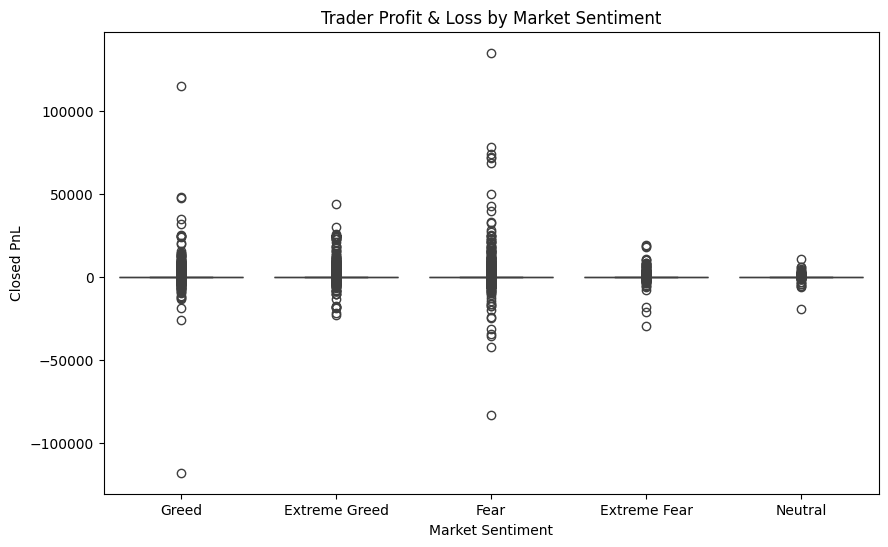

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title('Trader Profit & Loss by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()

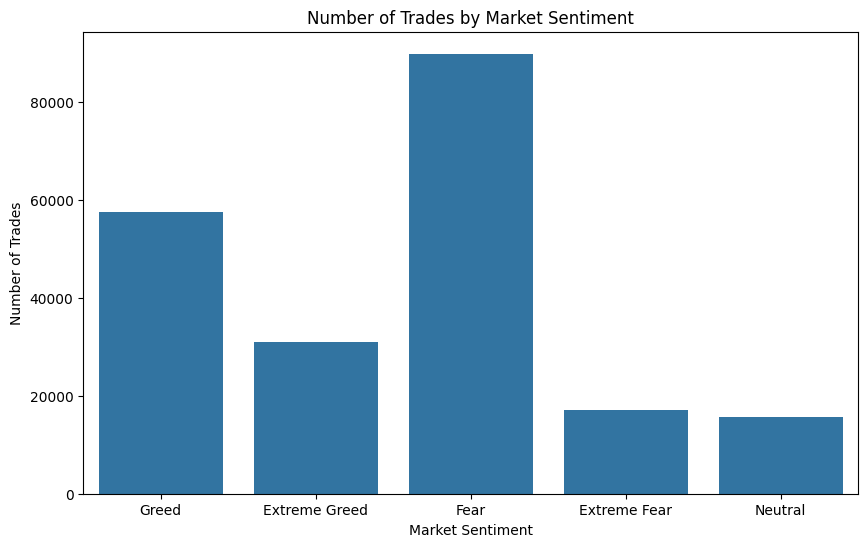

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='classification', data=merged)
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()


/tmp/ipython-input-3652923474.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=merged, estimator='mean', ci=None)


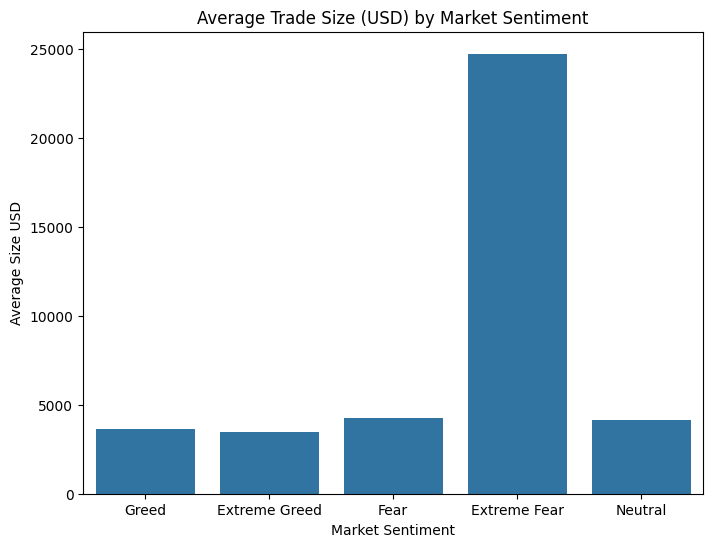

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='classification', y='Size USD', data=merged, estimator='mean', ci=None)
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.ylabel('Average Size USD')
plt.xlabel('Market Sentiment')
plt.show()

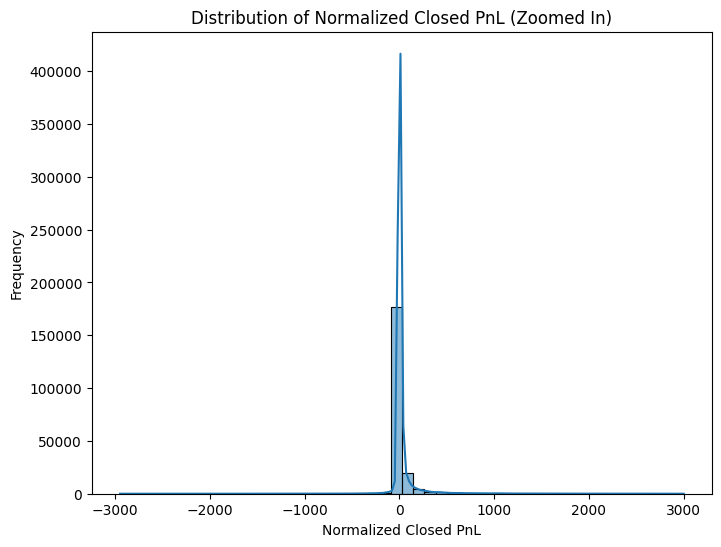

In [25]:
zoomed_data = merged[(merged['Closed PnL'] > -3000) & (merged['Closed PnL'] < 3000)]

plt.figure(figsize=(8,6))
sns.histplot(zoomed_data['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Normalized Closed PnL (Zoomed In)')
plt.xlabel('Normalized Closed PnL')
plt.ylabel('Frequency')
plt.show()

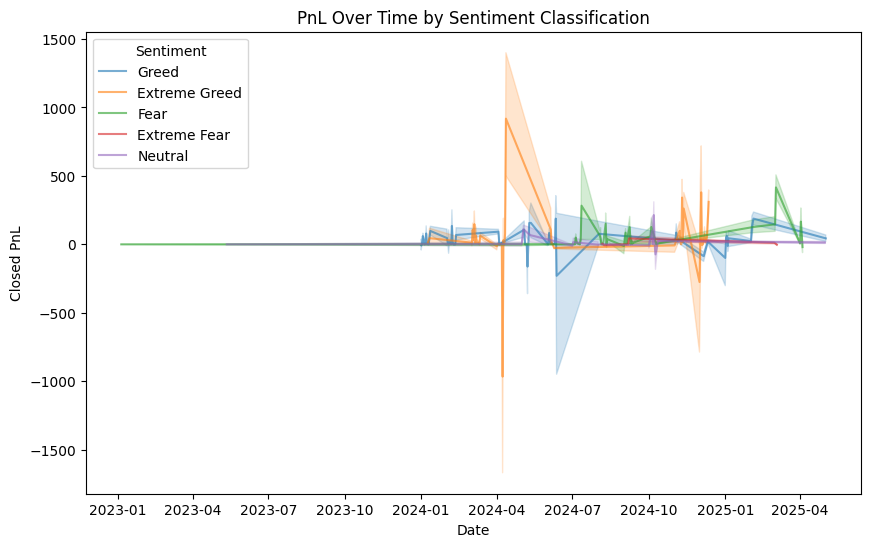

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x='sentiment_date', y='Closed PnL', data=merged, hue='classification', alpha=0.6)
plt.title('PnL Over Time by Sentiment Classification')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment')
plt.show()


In [19]:
mean_pnl = merged.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print(mean_pnl)


classification
Extreme Greed    95.377129
Fear             46.030630
Greed            39.997999
Extreme Fear     35.493854
Neutral          18.894528
Name: Closed PnL, dtype: float64


In [20]:
from scipy.stats import ttest_ind

fear_pnl = merged[merged['classification'].str.contains('Fear', na=False)]['Closed PnL']
greed_pnl = merged[merged['classification'].str.contains('Greed', na=False)]['Closed PnL']

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")


T-statistic: -3.473, P-value: 0.0005


In [21]:
top_coins = merged.groupby('Coin')['Closed PnL'].mean().sort_values(ascending=False).head(10)
print(top_coins)


Coin
@109       270.704207
AVAX       239.095613
ENA        219.524751
@85        200.804091
EIGEN      197.063189
PEOPLE     180.323003
DOGE       178.623676
SOL        153.358519
MOODENG    151.096714
ZRO        148.327509
Name: Closed PnL, dtype: float64


In [22]:
top_accounts = merged.groupby('Account')['Closed PnL'].mean().sort_values(ascending=False).head(10)
print(top_accounts)


Account
0x420ab45e0bd8863569a5efbb9c05d91f40624641    520.902331
0x083384f897ee0f19899168e3b1bec365f52a9012    419.127768
0x430f09841d65beb3f27765503d0f850b8bce7713    336.735548
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    281.826227
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    270.034947
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0    174.691809
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6    161.133275
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    155.589314
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    145.481748
0xae5eacaf9c6b9111fd53034a602c192a04e082ed    120.507317
Name: Closed PnL, dtype: float64


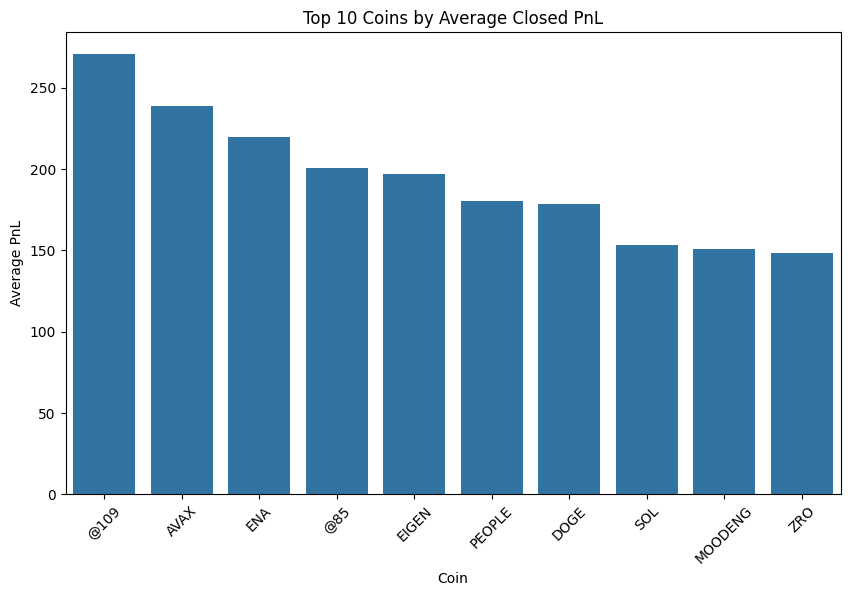

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_coins.index, y=top_coins.values)
plt.xticks(rotation=45)
plt.title('Top 10 Coins by Average Closed PnL')
plt.ylabel('Average PnL')
plt.show()


In [24]:
correlation = merged['value'].corr(merged['Closed PnL'])
print(f'Correlation between sentiment value and Closed PnL: {correlation:.3f}')

Correlation between sentiment value and Closed PnL: 0.011


In [25]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'trade_date', 'sentiment_date', 'classification', 'value'],
      dtype='object')


              precision    recall  f1-score   support

           0       0.83      0.84      0.84     37218
           1       0.77      0.76      0.76     26150

    accuracy                           0.81     63368
   macro avg       0.80      0.80      0.80     63368
weighted avg       0.81      0.81      0.81     63368



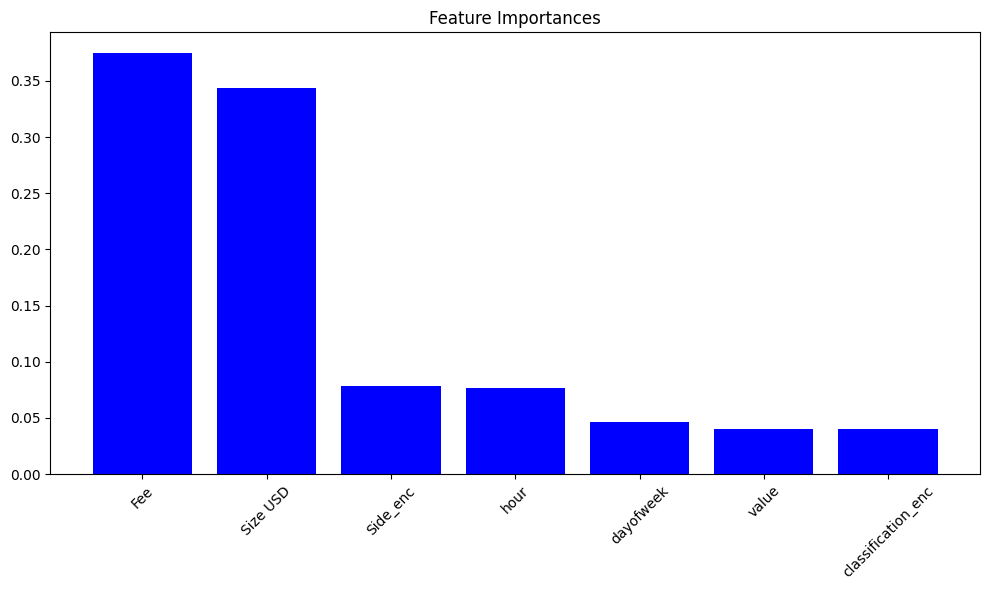

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


merged['Side_enc'] = merged['Side'].map({'BUY': 1, 'SELL': 0})
merged['classification_enc'] = merged['classification'].astype('category').cat.codes


merged['normalized_pnl'] = merged['Closed PnL'] / (merged['Size USD'] + 1e-6)

merged['hour'] = pd.to_datetime(merged['Timestamp IST'], unit='s', errors='coerce').dt.hour
merged['dayofweek'] = pd.to_datetime(merged['Timestamp IST'], unit='s', errors='coerce').dt.dayofweek


merged['profitable'] = (merged['Closed PnL'] > 0).astype(int)

features = ['value', 'Size USD', 'Fee', 'Side_enc', 'classification_enc', 'hour', 'dayofweek']

X = merged[features].fillna(0)
y = merged['profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(len(features)), importances[indices], color='b', align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()




Optimal Probability Threshold: 0.35


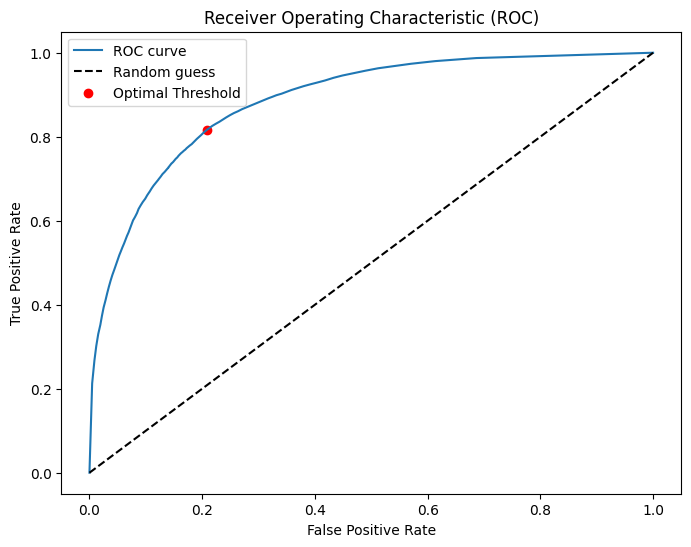

In [27]:
from sklearn.metrics import roc_curve

probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_thresh = thresholds[optimal_idx]
print(f"Optimal Probability Threshold: {optimal_thresh:.2f}")
# Generate binary trading signals using optimal threshold
trading_signals = (probs >= optimal_thresh).astype(int)

# Only "trade" on those with high enough predicted probability of success
selected_trades = X_test[trading_signals == 1]
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


In [28]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_thresh = thresholds[optimal_idx]
print(f"Optimal Probability Threshold: {optimal_thresh:.2f}")

# 2. Generate trading signals
trading_signals = (probs >= optimal_thresh).astype(int)

# 3. Select trades with signals = 1
selected_indices = X_test.index[trading_signals == 1]

# 4. Get full data from original dataframe
selected_trades = merged.loc[selected_indices]

# 5. Add predicted probabilities and signals for context
selected_trades = selected_trades.copy()
selected_trades['predicted_prob'] = probs[trading_signals == 1]
selected_trades['trade_signal'] = 1

# 6. Show summary stats
print("Number of trades selected:", selected_trades.shape[0])
print("Average Closed PnL of selected trades:", selected_trades['Closed PnL'].mean())

# 7. Show sample selected trades
print(selected_trades.head())


Optimal Probability Threshold: 0.35
Number of trades selected: 29080
Average Closed PnL of selected trades: 95.41726019360385
                                           Account     Coin  Execution Price  \
204807  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  MELANIA           0.7642   
71059   0xbaaaf6571ab7d571043ff1e313a9609a10637864     HYPE          17.5350   
164536  0xbee1707d6b44d4d52bfe19e41f8a828645437aab     @107          29.4350   
170019  0xbee1707d6b44d4d52bfe19e41f8a828645437aab     @107          23.2600   
149480  0xb899e522b5715391ae1d4f137653e7906c5e2115      SOL         127.4700   

        Size Tokens  Size USD  Side       Timestamp IST  Start Position  \
204807       515.90    394.25   BUY 2025-08-03 20:36:00     -514.900000   
71059        115.36   2022.84  SELL 2025-05-03 04:42:00   178757.550000   
164536        15.00    441.52  SELL                 NaT    16743.937780   
170019        85.72   1993.85  SELL                 NaT     3797.148802   
149480        54.9

In [29]:
merged['predicted_profitable'] = model.predict(X.fillna(0))

accuracy_by_sentiment = merged.groupby('classification').apply(
    lambda df: (df['profitable'] == df['predicted_profitable']).mean()
)
print("Model Accuracy by Sentiment:")
print(accuracy_by_sentiment)


Model Accuracy by Sentiment:
classification
Extreme Fear     0.948810
Extreme Greed    0.933626
Fear             0.936847
Greed            0.940744
Neutral          0.936523
dtype: float64


/tmp/ipython-input-735377300.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_sentiment = merged.groupby('classification').apply(


In [30]:
!pip install shap

In [30]:
import shap

explainer = shap.TreeExplainer(model)

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")